# Variable Transformation

The purpose of variable transformation is to modify the distribution of data to meet the assumptions of statistical models, improve model performance, or make the data more interpretable. Data scientists apply transformations, such as logarithmic, square root, or power transformations, to reduce skewness, stabilize variance, and enhance the linearity of relationships between variables. This process helps in achieving more accurate and reliable predictive models by ensuring that the data aligns better with the underlying mathematical assumptions of the techniques being used.

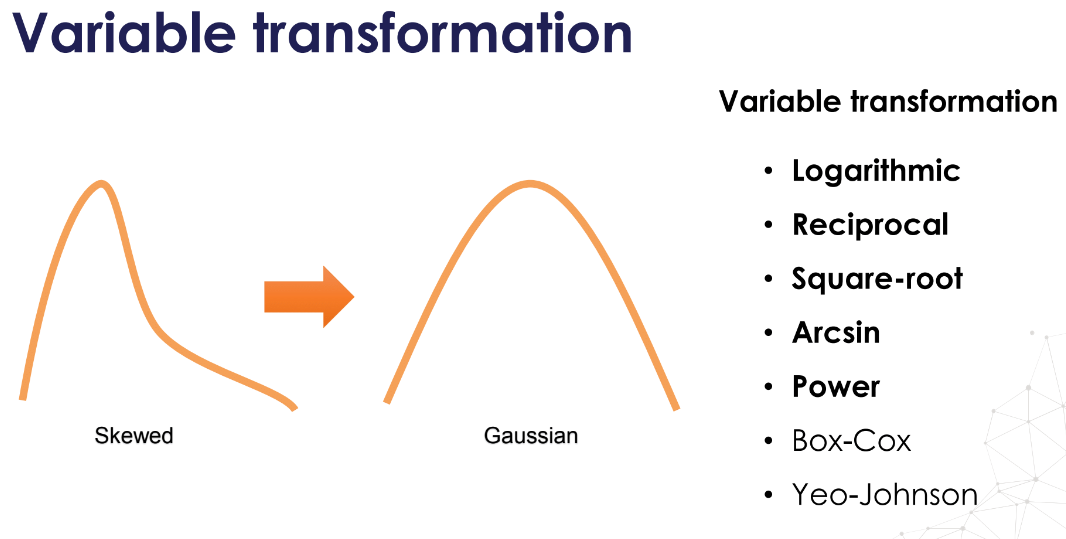

**Logarithmic**

Description and Usage: The logarithmic transformation applies the natural logarithm to the data to stabilize variance and reduce skewness. It is widely used across various fields such as finance, biology, and economics to normalize data and handle exponential growth patterns.

**Reciprocal**

Description and Usage: The reciprocal transformation (1/x) inversely scales the data, which helps to manage extreme values and inverse relationships. Though less common, it is useful in scenarios where data has a clear inverse proportionality or contains very large values.

**Square Root**

Description and Usage: The square root transformation applies the square root function to the data, which helps in reducing skewness and stabilizing variance, similar to the logarithm but in a less aggressive manner. It is frequently used in diverse applications like count data and various statistical analyses.

**Arcsin**

Description and Usage: The arcsine square root transformation is applied to proportion or probability data bounded between 0 and 1. It is often used in fields such as ecology and epidemiology to normalize data and handle bounded data effectively.

**Power**

Description and Usage: The power transformation (x^λ) applies a customizable exponent to the data, allowing adjustment of the data distribution shape. It is versatile and commonly used in regression and machine learning to address skewness and variance issues by transforming data according to the desired exponent.

**Box-Cox**

Description and Usage: The Box-Cox transformation is a flexible method that finds an optimal lambda (λ) to stabilize variance and normalize data. It generalizes several transformations, including the logarithm and square root, making it widely used in regression analysis and time series forecasting for data normalization and variance stabilization.

**Yeo-Johnson**

Description and Usage: The Yeo-Johnson transformation extends the Box-Cox method to handle zero and negative values. It finds an optimal lambda (λ) to normalize data and is particularly useful in machine learning and statistical modeling for datasets that include negative or zero values.

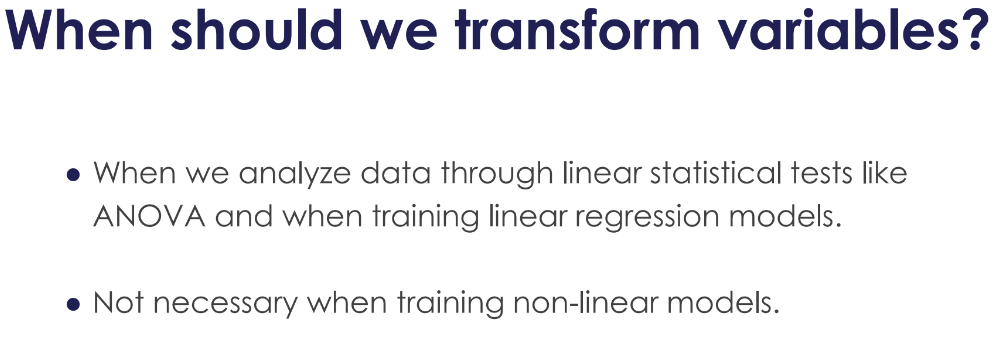

# Variable transformation with Numpy and Scipy

## Template

In [ ]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

In [ ]:
def diagnostic_plots(df, variable):

    # Step 1: Set up the figure size for the plots
    # Creates a figure with a specified size for the plots.
    plt.figure(figsize=(15, 6))

    # Step 2: Create a histogram plot for the variable
    # Plots a histogram of the specified variable.
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # Step 3: Create a Q-Q plot for the variable
    # Plots a Q-Q plot to assess if the data is normally distributed.
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    # Step 4: Display the plots
    # Renders the histogram and Q-Q plot on the screen.
    plt.show()

In [ ]:
# Check function output
diagnostic_plots(X, "MedInc")
diagnostic_plots(X, "Population")

## Logarithm

In [ ]:
# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: List the variables to transform
# Defines a list of variables that will undergo a logarithmic transformation.
variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

# Step 3: Apply log to a set of variables
# Transforms the specified variables in `X_tf` using the natural logarithm.
X_tf[variables] = np.log(X[variables])

# Step 4: Use the diagnostic plot function to corroborate variable transformation
# Generates a histogram and Q-Q plot to verify the logarithmic transformation of "MedInc".
diagnostic_plots(X_tf, "MedInc")

# Step 5: Use the diagnostic plot function to corroborate another variable transformation
# Generates a histogram and Q-Q plot to verify the logarithmic transformation of "AveRooms".
diagnostic_plots(X_tf, "AveRooms")

### Logarithm plus constant


In [ ]:
# apply log plus a constant to a set of variables
# we can also use np.log1p()
X_tf[variables] = np.log(X[variables] + 1)

## Reciprocal transformation

In [ ]:
# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: Apply the reciprocal to a set of variables
# Computes the reciprocal of the "AveOccup" variable and stores it in the dataframe.
X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])

# Step 3: Use the diagnostic plot function to corroborate variable transformation
# Generates a histogram and Q-Q plot to verify the transformation of "AveOccup".
diagnostic_plots(X_tf, "AveOccup")

## Square-root transformation


In [ ]:
# create dataframe
df = pd.DataFrame()

# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

In [ ]:
# Step 1: Make a copy of the dataframe
# Creates a duplicate of the original dataframe `df` to preserve the original data.
df_tf = df.copy()

# Step 2: Apply square root transformation
# Applies the square root transformation to the "counts1" and "counts2" columns.
df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1", "counts2"]])

# Step 3: Round the transformed values
# Rounds the values in the "counts1" and "counts2" columns to 2 decimal places.
df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)

# Step 4: Use the diagnostic plot function to corroborate variable transformation for "counts1"
# Generates a histogram and Q-Q plot to verify the square root transformation of "counts1".
diagnostic_plots(df_tf, "counts1")

# Step 5: Use the diagnostic plot function to corroborate variable transformation for "counts2"
# Generates a histogram and Q-Q plot to verify the square root transformation of "counts2".
diagnostic_plots(df_tf, "counts2")

## Power transformation

In [ ]:
# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: Make a list with the variables to transform
# Defines a list of variables that will undergo a power transformation.
variables = ["MedInc", "Population"]

# Step 3: Apply a 0.3 exponent power transformation to a set of variables
# Transforms the specified variables in `X_tf` by raising them to the power of 0.3.
X_tf[variables] = np.power(X[variables], 0.3)

# Step 4: Check the distribution of the transformed "MedInc" variable
# Generates a histogram and Q-Q plot to verify the power transformation of "MedInc".
diagnostic_plots(X_tf, "MedInc")

# Step 5: Check the distribution of the transformed "Population" variable
# Generates a histogram and Q-Q plot to verify the power transformation of "Population".
diagnostic_plots(X_tf, "Population")

## Box-Cox transformation


In [ ]:
# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: Apply the Box-Cox transformation to the variable "MedInc"
# Transforms the "MedInc" variable using the Box-Cox transformation and stores the result in `X_tf`.
# The optimal lambda (λ) parameter for the transformation is also calculated and stored in `param`.
X_tf["MedInc"], param = stats.boxcox(X["MedInc"])

# Step 3: Print the optimal lambda found for "MedInc"
# Displays the optimal lambda value that was used in the Box-Cox transformation.
print("Optimal λ: ", param)

# Step 4: Check the distribution of the transformed "MedInc" variable
# Generates a histogram and Q-Q plot to verify the Box-Cox transformation of "MedInc".
diagnostic_plots(X_tf, "MedInc")

## Yeo-Johnson transformation


In [ ]:
# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: Apply the Yeo-Johnson transformation to the variable "MedInc"
# Transforms the "MedInc" variable using the Yeo-Johnson transformation and stores the result in `X_tf`.
# The optimal lambda (λ) parameter for the transformation is also calculated and stored in `param`.
X_tf["MedInc"], param = stats.yeojohnson(X["MedInc"])

# Step 3: Print the optimal lambda found for "MedInc"
# Displays the optimal lambda value that was used in the Yeo-Johnson transformation.
print("Optimal λ: ", param)

# Step 4: Check the distribution of the transformed "MedInc" variable
# Generates a histogram and Q-Q plot to verify the Yeo-Johnson transformation of "MedInc".
diagnostic_plots(X_tf, "MedInc")

## Arcsin transformation


In [ ]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Select the variables to transform
variables = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']

In [ ]:
# Step 1: Make a copy of the data
# Creates duplicates of the training and testing dataframes to store the transformed variables.
train_t = X_train.copy()
test_t = X_test.copy()

# Step 2: Transform the data using the arcsin square root transformation
# Applies the arcsin square root transformation to the specified variables in the training and testing datasets.
# This transformation is commonly used for proportions or percentages to normalize the distribution.
train_t[variables] = np.arcsin(np.sqrt(X_train[variables]))
test_t[variables] = np.arcsin(np.sqrt(X_test[variables]))

# Step 3: Visualize the distribution of the transformed variables
# Plots histograms for the transformed variables in the training data to inspect the new distribution.
train_t[variables].hist(figsize=(20, 20), bins=30)
plt.show()

# Variable transformation with Sklearn

## Logarithm

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: Set up the transformer with NumPy's log function as the parameter
# Initializes a FunctionTransformer that will apply the natural logarithm transformation
# to the data and allows for reversing the transformation using the exponential function.
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

# Step 3: Transform a subset of the dataframe (remember that we made a copy earlier)
# Applies the logarithmic transformation to the specified variables in the dataframe `X_tf`.
X_tf[variables] = transformer.transform(X[variables])

# Step 4: Use the diagnostic plot function to corroborate the variable transformation
# Generates a histogram and Q-Q plot to verify the logarithmic transformation of "MedInc".
diagnostic_plots(X_tf, "MedInc")

# Step 5: Revert to the original representation
# Reverses the logarithmic transformation, returning the variables in `X_tf` to their original scale.
X_tf[variables] = transformer.inverse_transform(X_tf[variables])

# Step 6: Use the diagnostic plot function to corroborate the reversion
# Generates a histogram and Q-Q plot to verify that "MedInc" has been reverted to its original form.
diagnostic_plots(X_tf, "MedInc")

### Logarithm plus constant

In [ ]:
transformer = FunctionTransformer(lambda x: np.log(x + 1))

## Reciprocal transformation

In [ ]:
# Step 1: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 2: Initialize the transformer with NumPy's reciprocal function as the parameter
# Sets up a FunctionTransformer to apply the reciprocal transformation to the data.
transformer = FunctionTransformer(func=np.reciprocal)

# Step 3: Transform a subset of the dataframe
# Applies the reciprocal transformation to the "AveOccup" column in the dataframe `X_tf`.
X_tf["AveOccup"] = transformer.transform(X["AveOccup"])

# Step 4: Use the diagnostic plot function to corroborate the variable transformation
# Generates a histogram and Q-Q plot to verify the reciprocal transformation of "AveOccup".
diagnostic_plots(X_tf, "AveOccup")

## Square root transformation

In [ ]:
# Step 1: Make a copy of the data
# Creates a duplicate of the original dataframe `df` to preserve the original data.
df_tf = df.copy()

# Step 2: Set up the transformer with desired operations
# Initializes a FunctionTransformer that applies a combination of square root transformation and rounding to 2 decimal places.
transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

# Step 3: Transform a slice of the dataframe with variables to transform
# Applies the square root transformation and rounding to the specified columns in the dataframe `df`.
df_tf[["counts1", "counts2"]] = transformer.transform(df[["counts1", "counts2"]])

# Step 4: Check the distribution of the transformed "counts1" variable
# Generates a histogram and Q-Q plot to verify the transformation of "counts1".
diagnostic_plots(df_tf, "counts1")

# Step 5: Check the distribution of the transformed "counts2" variable
# Generates a histogram and Q-Q plot to verify the transformation of "counts2".
diagnostic_plots(df_tf, "counts2")

## Power transformation

In [ ]:
# Step 1: Define the variables to be transformed
# Specifies the columns in the dataframe that will undergo the transformation.
variables = ["MedInc", "Population"]

# Step 2: Make a copy of the dataframe where we will store the modified variables
# Creates a duplicate of the original dataframe `X` to preserve the original data.
X_tf = X.copy()

# Step 3: Set up the transformer with a user-defined function, in this case, the 0.3 power transformation
# Initializes a FunctionTransformer to apply a power transformation with an exponent of 0.3.
transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

# Step 4: Transform a slice of the dataframe with the indicated variables
# Applies the 0.3 power transformation to the specified columns in the dataframe `X_tf`.
X_tf[variables] = transformer.transform(X[variables])

# Step 5: Visualize the transformation for "MedInc"
# Generates a histogram and Q-Q plot to verify the transformation of the "MedInc" variable.
diagnostic_plots(X_tf, "MedInc")

# Step 6: Visualize the transformation for "Population"
# Generates a histogram and Q-Q plot to verify the transformation of the "Population" variable.
diagnostic_plots(X_tf, "Population")

## Box-Cox transformation

### Prior transformation overview

In [ ]:
# capture variable names in a list
variables = list(X.columns)
variables

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Step 1: Define a function to make Q-Q plots for all specified variables
# Creates Q-Q plots for the variables in the dataframe to assess their distribution relative to a normal distribution.
def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # Location in figure
        ax = plt.subplot(2, 3, i + 1)

        # Variable to plot
        var = variables[i]

        # Q-Q plot
        stats.probplot(df[var], dist="norm", plot=ax)

        # Add variable name as title
        ax.set_title(var)

    plt.show()

# Step 2: Call the function to make Q-Q plots for all variables
# Generates Q-Q plots for the specified variables in the dataframe `X` to check their normality.
make_qqplot(X)

### Post transformation overview

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Step 1: Initialize the transformer with Box-Cox method
# Sets up a PowerTransformer to apply Box-Cox transformation to the data.
transformer = PowerTransformer(method="box-cox", standardize=False)

# Step 2: Configure transformer to output a pandas DataFrame
# Ensures that the transformed data will be returned as a pandas DataFrame.
transformer.set_output(transform="pandas")

# Step 3: Fit the transformer to the data
# The transformer learns the optimal lambda values for the Box-Cox transformation.
transformer.fit(X)

# Step 4: Retrieve the learned lambda values
# Accesses the lambda values that were determined during fitting.
transformer.lambdas_

# Step 5: Transform the data
# Applies the Box-Cox transformation to the data, returning the results as a pandas DataFrame.
X_tf = transformer.transform(X)

# Step 6: Plot histograms to inspect variable distributions
# Generates histograms for the transformed variables to visualize their distributions.
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

# Step 7: Make Q-Q plots for all variables
# Creates Q-Q plots to check if the transformed variables follow a normal distribution.
make_qqplot(X_tf)

## Yeo-Johnson transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Step 1: Initialize the transformer with Box-Cox method
# Sets up a PowerTransformer to apply Box-Cox transformation to the data.
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# Step 2: Configure transformer to output a pandas DataFrame
# Ensures that the transformed data will be returned as a pandas DataFrame.
transformer.set_output(transform="pandas")

# Step 3: Fit the transformer to the data
# The transformer learns the optimal lambda values for the Box-Cox transformation.
transformer.fit(X)

# Step 4: Retrieve the learned lambda values
# Accesses the lambda values that were determined during fitting.
transformer.lambdas_

# Step 5: Transform the data
# Applies the Box-Cox transformation to the data, returning the results as a pandas DataFrame.
X_tf = transformer.transform(X)

# Step 6: Plot histograms to inspect variable distributions
# Generates histograms for the transformed variables to visualize their distributions.
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

# Step 7: Make Q-Q plots for all variables
# Creates Q-Q plots to check if the transformed variables follow a normal distribution.
make_qqplot(X_tf)

## Arcsin Transformation

In [ ]:
# with open-source packages
from sklearn.preprocessing import FunctionTransformer

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Capture the column names within the dataset
variables = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Step 1: Make a copy of the data
# Creates duplicates of the training and testing dataframes to store the transformed variables.
train_t = X_train.copy()
test_t = X_test.copy()

# Step 2: Set up the transformer with desired operations
# Initializes a FunctionTransformer to apply the arcsin square root transformation.
tf = FunctionTransformer(func=lambda x: np.arcsin(np.sqrt(x)))

# Step 3: Configure transformer to output a pandas DataFrame
# Ensures that the transformed data will be returned as a pandas DataFrame.
tf.set_output(transform="pandas")

# Step 4: Transform the data
# Applies the arcsin square root transformation to the specified variables in both the training and testing datasets.
train_t[variables] = tf.transform(X_train[variables])
test_t[variables] = tf.transform(X_test[variables])

### Prior/Post transformation overview

In [ ]:
# Step 1: Check original variables
# Generates histograms for the specified variables in the original training dataset to inspect their initial distributions.
X_train[variables].hist(figsize=(20, 20), bins=30)
plt.show()

# Step 2: Check transformed variables
# Generates histograms for the same variables in the transformed training dataset to inspect the effect of the transformation.
train_t[variables].hist(figsize=(20, 20), bins=30)
plt.show()

# Variable transformation with Feature Engine

## Logarithm

In [ ]:
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import LogCpTransformer

# Step 1: Define the list of variables to transform
# Specifies the columns in the dataframe that will undergo the logarithmic transformation.
variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

# Step 2: Set up the LogTransformer with the variables to modify
# Initializes a LogTransformer to apply the natural logarithm transformation to the specified variables.
lt = LogTransformer(variables=variables)

# Step 3: Fit the transformer to the dataset
# Fits the LogTransformer to the data, learning the necessary parameters for the transformation.
lt.fit(X)

# Step 4: Retrieve the variables that were transformed
# Accesses the list of variables that the LogTransformer has transformed.
lt.variables_

# Step 5: Transform the variables in the dataset
# Applies the logarithmic transformation to the specified columns in the dataframe `X`.
X_tf = lt.transform(X)

# Step 6: Use the diagnostic plot function to corroborate the variable transformation
# Generates a histogram and Q-Q plot to verify the transformation of the "MedInc" variable.
diagnostic_plots(X_tf, "MedInc")

# Step 7: Revert to the original representation
# Reverses the logarithmic transformation to return the variables in `X_tf` to their original scale.
X_tf = lt.inverse_transform(X_tf)

# Step 8: Use the diagnostic plot function to check the reverted variable
# Generates a histogram and Q-Q plot to verify that "MedInc" has been reverted to its original form.
diagnostic_plots(X_tf, "MedInc")

### Logarithm plus constant

In [ ]:
from feature_engine.transformation import LogCpTransformer

# Step 1: Set up the transformer to find the minimum value per variable automatically
# Initializes a LogCpTransformer to apply the logarithmic transformation with an automatic constant added to avoid log(0).
lt = LogCpTransformer(variables=variables, C="auto")

# Step 2: Fit the transformer to the dataset
# Fits the LogCpTransformer to the data, determining the constant `C` to be used in the transformation.
lt.fit(X)

# Step 3: Retrieve the constant that will be added
# Accesses the constant `C` that was determined by the transformer to ensure no zero values in the logarithmic transformation.
lt.C_

# Step 4: Transform the variables in the dataset
# Applies the logarithmic transformation with the calculated constant to the specified columns in the dataframe `X`.
X_tf = lt.transform(X)

# Step 5: Use the diagnostic plot function to address the variable transformation
# Generates a histogram and Q-Q plot to verify the transformation of the "MedInc" variable.
diagnostic_plots(X_tf, "MedInc")

## Reciprocal transformation

In [ ]:
from feature_engine.transformation import ReciprocalTransformer

# Step 1: Initialize the transformer with the variable that we want to modify
# Sets up a ReciprocalTransformer to apply the reciprocal transformation to the "AveOccup" variable.
rt = ReciprocalTransformer(variables="AveOccup")

# Step 2: Fit the transformer to the entire dataframe
# Fits the ReciprocalTransformer to the data, learning the necessary parameters for the transformation.
rt.fit(X)

# Step 3: Transform the selected variable in the dataset
# Applies the reciprocal transformation to the specified variable "AveOccup" in the dataframe `X`.
X_tf = rt.transform(X)

# Step 4: Use the diagnostic plot function to corroborate the variable transformation
# Generates a histogram and Q-Q plot to verify the transformation of the "AveOccup" variable.
diagnostic_plots(X_tf, "AveOccup")

# Step 5: Revert to the original representation
# Reverses the reciprocal transformation to return the variable in `X_tf` to its original scale.
X_tf = rt.inverse_transform(X)

# Step 6: Use the diagnostic plot function to corroborate the reversion
# Generates a histogram and Q-Q plot to verify that "AveOccup" has been reverted to its original form.
diagnostic_plots(X_tf, "AveOccup")

## Square root transformation

In [ ]:
from feature_engine.transformation import PowerTransformer

# Step 1: Set up PowerTransformer with the square root
# Initializes a PowerTransformer to apply a square root transformation (exponent = 0.5) to the data.
root_t = PowerTransformer(exp=1 / 2)

# Step 2: Fit the transformer to the data
# Fits the PowerTransformer to the dataframe `df`, learning the necessary parameters for the transformation.
root_t.fit(df)

# Step 3: Automatically find numerical variables
# Retrieves the list of numerical variables that the PowerTransformer has applied the transformation to.
root_t.variables_

# Step 4: Transform the variables
# Applies the square root transformation to the dataframe `df`, returning the results as a new dataframe `df_tf`.
df_tf = root_t.transform(df)

# Step 5: Check distribution of the transformed "counts1" variable
# Generates a histogram and Q-Q plot to verify the transformation of the "counts1" variable.
diagnostic_plots(df_tf, "counts1")

# Step 6: Check distribution of the transformed "counts2" variable
# Generates a histogram and Q-Q plot to verify the transformation of the "counts2" variable.
diagnostic_plots(df_tf, "counts2")

## Power transformation

In [ ]:
from feature_engine.transformation import PowerTransformer

# Step 1: Initialize the transformer with the variables to transform and the desired exponent
# Sets up a PowerTransformer to apply a transformation with an exponent of 0.3 to the specified variables.
power_t = PowerTransformer(variables=variables, exp=0.3)

# Step 2: Fit the transformer to the data
# Fits the PowerTransformer to the dataframe `X`, learning the necessary parameters for the transformation.
power_t.fit(X)

# Step 3: Transform the selected variables
# Applies the power transformation with an exponent of 0.3 to the specified columns in the dataframe `X`.
X_tf = power_t.transform(X)

# Step 4: Check the distribution of the transformed "MedInc" variable
# Generates a histogram and Q-Q plot to verify the transformation of the "MedInc" variable.
diagnostic_plots(X_tf, "MedInc")

# Step 5: Check the distribution of the transformed "Population" variable
# Generates a histogram and Q-Q plot to verify the transformation of the "Population" variable.
diagnostic_plots(X_tf, "Population")

## Box-Cox transformation

In [ ]:
from feature_engine.transformation import BoxCoxTransformer

# Step 1: Set up the transformer
# Initializes a BoxCoxTransformer that automatically identifies numerical variables and applies the Box-Cox transformation.
bct = BoxCoxTransformer()

# Step 2: Fit the transformer to the dataset
# Fits the BoxCoxTransformer to the dataframe `X`, learning the optimal lambda values for each variable.
bct.fit(X)

# Step 3: Retrieve the exponents (lambdas) for each variable
# Accesses the lambda values used for the Box-Cox transformation for each variable.
bct.lambda_dict_

# Step 4: Transform the variables
# Applies the Box-Cox transformation to the dataframe `X`, returning the results as a new dataframe `X_tf`.
X_tf = bct.transform(X)

# Step 5: Plot histograms to inspect variable distributions
# Generates histograms for the transformed variables to visualize their distributions.
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

# Step 6: Make Q-Q plots for all variables
# Creates Q-Q plots to check if the transformed variables follow a normal distribution.
make_qqplot(X_tf)

## Yeo-ohnson transformation

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

# Step 1: Set up the transformer
# Initializes a YeoJohnsonTransformer that automatically identifies numerical variables and applies the Yeo-Johnson transformation.
yjt = YeoJohnsonTransformer()

# Step 2: Fit the transformer to the dataframe
# Fits the YeoJohnsonTransformer to the dataframe `X`, learning the optimal lambda values for each variable.
yjt.fit(X)

# Step 3: Retrieve the exponents (lambdas) for each variable
# Accesses the lambda values used for the Yeo-Johnson transformation for each variable.
yjt.lambda_dict_

# Step 4: Transform the variables
# Applies the Yeo-Johnson transformation to the dataframe `X`, returning the results as a new dataframe `X_tf`.
X_tf = yjt.transform(X)

# Step 5: Plot histograms to inspect variable distributions
# Generates histograms for the transformed variables to visualize their distributions.
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

# Step 6: Make Q-Q plots for all variables
# Creates Q-Q plots to check if the transformed variables follow a normal distribution.
make_qqplot(X_tf)

## Arcsin Transformation

In [ ]:
from feature_engine.transformation import ArcsinTransformer
from sklearn.model_selection import train_test_split

# Step 1: Separate data into train and test sets
# Splits the dataset `X` and target variable `y` into training and testing subsets, using a random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 2: Define the list of variables to transform
# Specifies the columns in the dataframe that will undergo the arcsin transformation.
vars_ = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']

In [ ]:
from feature_engine.transformation import ArcsinTransformer

# Step 1: Set up the Arcsin transformer
# Initializes an ArcsinTransformer to apply the arcsin transformation to the specified variables.
tf = ArcsinTransformer(variables=vars_)

# Step 2: Fit the transformer
# Fits the ArcsinTransformer to the training data `X_train`, learning the necessary parameters for the transformation.
tf.fit(X_train)

# Step 3: Transform the data
# Applies the arcsin transformation to both the training and testing datasets.
train_t = tf.transform(X_train)
test_t = tf.transform(X_test)

# Step 4: Plot histograms of the original variables
# Generates histograms for the specified variables in the original training dataset to inspect their distributions before transformation.
X_train[vars_].hist(figsize=(20, 20), bins=30)
plt.show()

# Step 5: Plot histograms of the transformed variables
# Generates histograms for the transformed variables in the training dataset to inspect their distributions after applying the arcsin transformation.
train_t[vars_].hist(figsize=(20, 20), bins=30)
plt.show()

# Summary

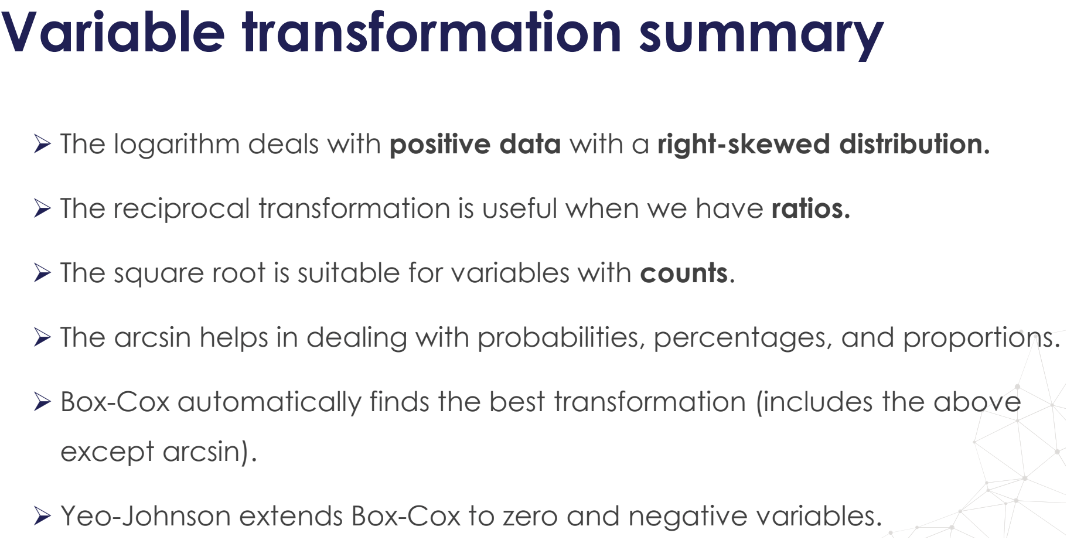